In [378]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

**Duomenų nuskaitymas**

In [379]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

**Kategorizuojamas alkoholis**

In [380]:
#alcohol content 8-9 is low, 9-10 is medium low, 10-11 is medium, 11-12 is medium high, 12-13 is high, 13-14 is very high, 14-15 is extra high
df['alcohol'] = pd.cut(df['alcohol'], bins=[8, 9, 10, 11, 12, 13, 14, 15], labels=['low', 'medium low', 'medium','medium high', 'high', 'very high','extra high'])
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

          alcohol  quality  
0      medium low        5  
1      medium low        5  
2      medium low        5  
3      medium low        6  
4      medium low        5  
...           ...      ...  
1594       medium        5  
1595  medium high        6  
1596       medium        6  
1597       medium        5  
1598       medium        6  

[1599 rows x 12 columns]

**Prognozuojamas atributas: alcohol, kardinalumas 7.** 

In [381]:
X = df.drop("alcohol", axis=1)
y = df.alcohol

**Sudaromi apmokymo ir testavimo poaibiai**

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1 sprendimų medis, gylis 4**

Tikslumo paklaida:  0.65


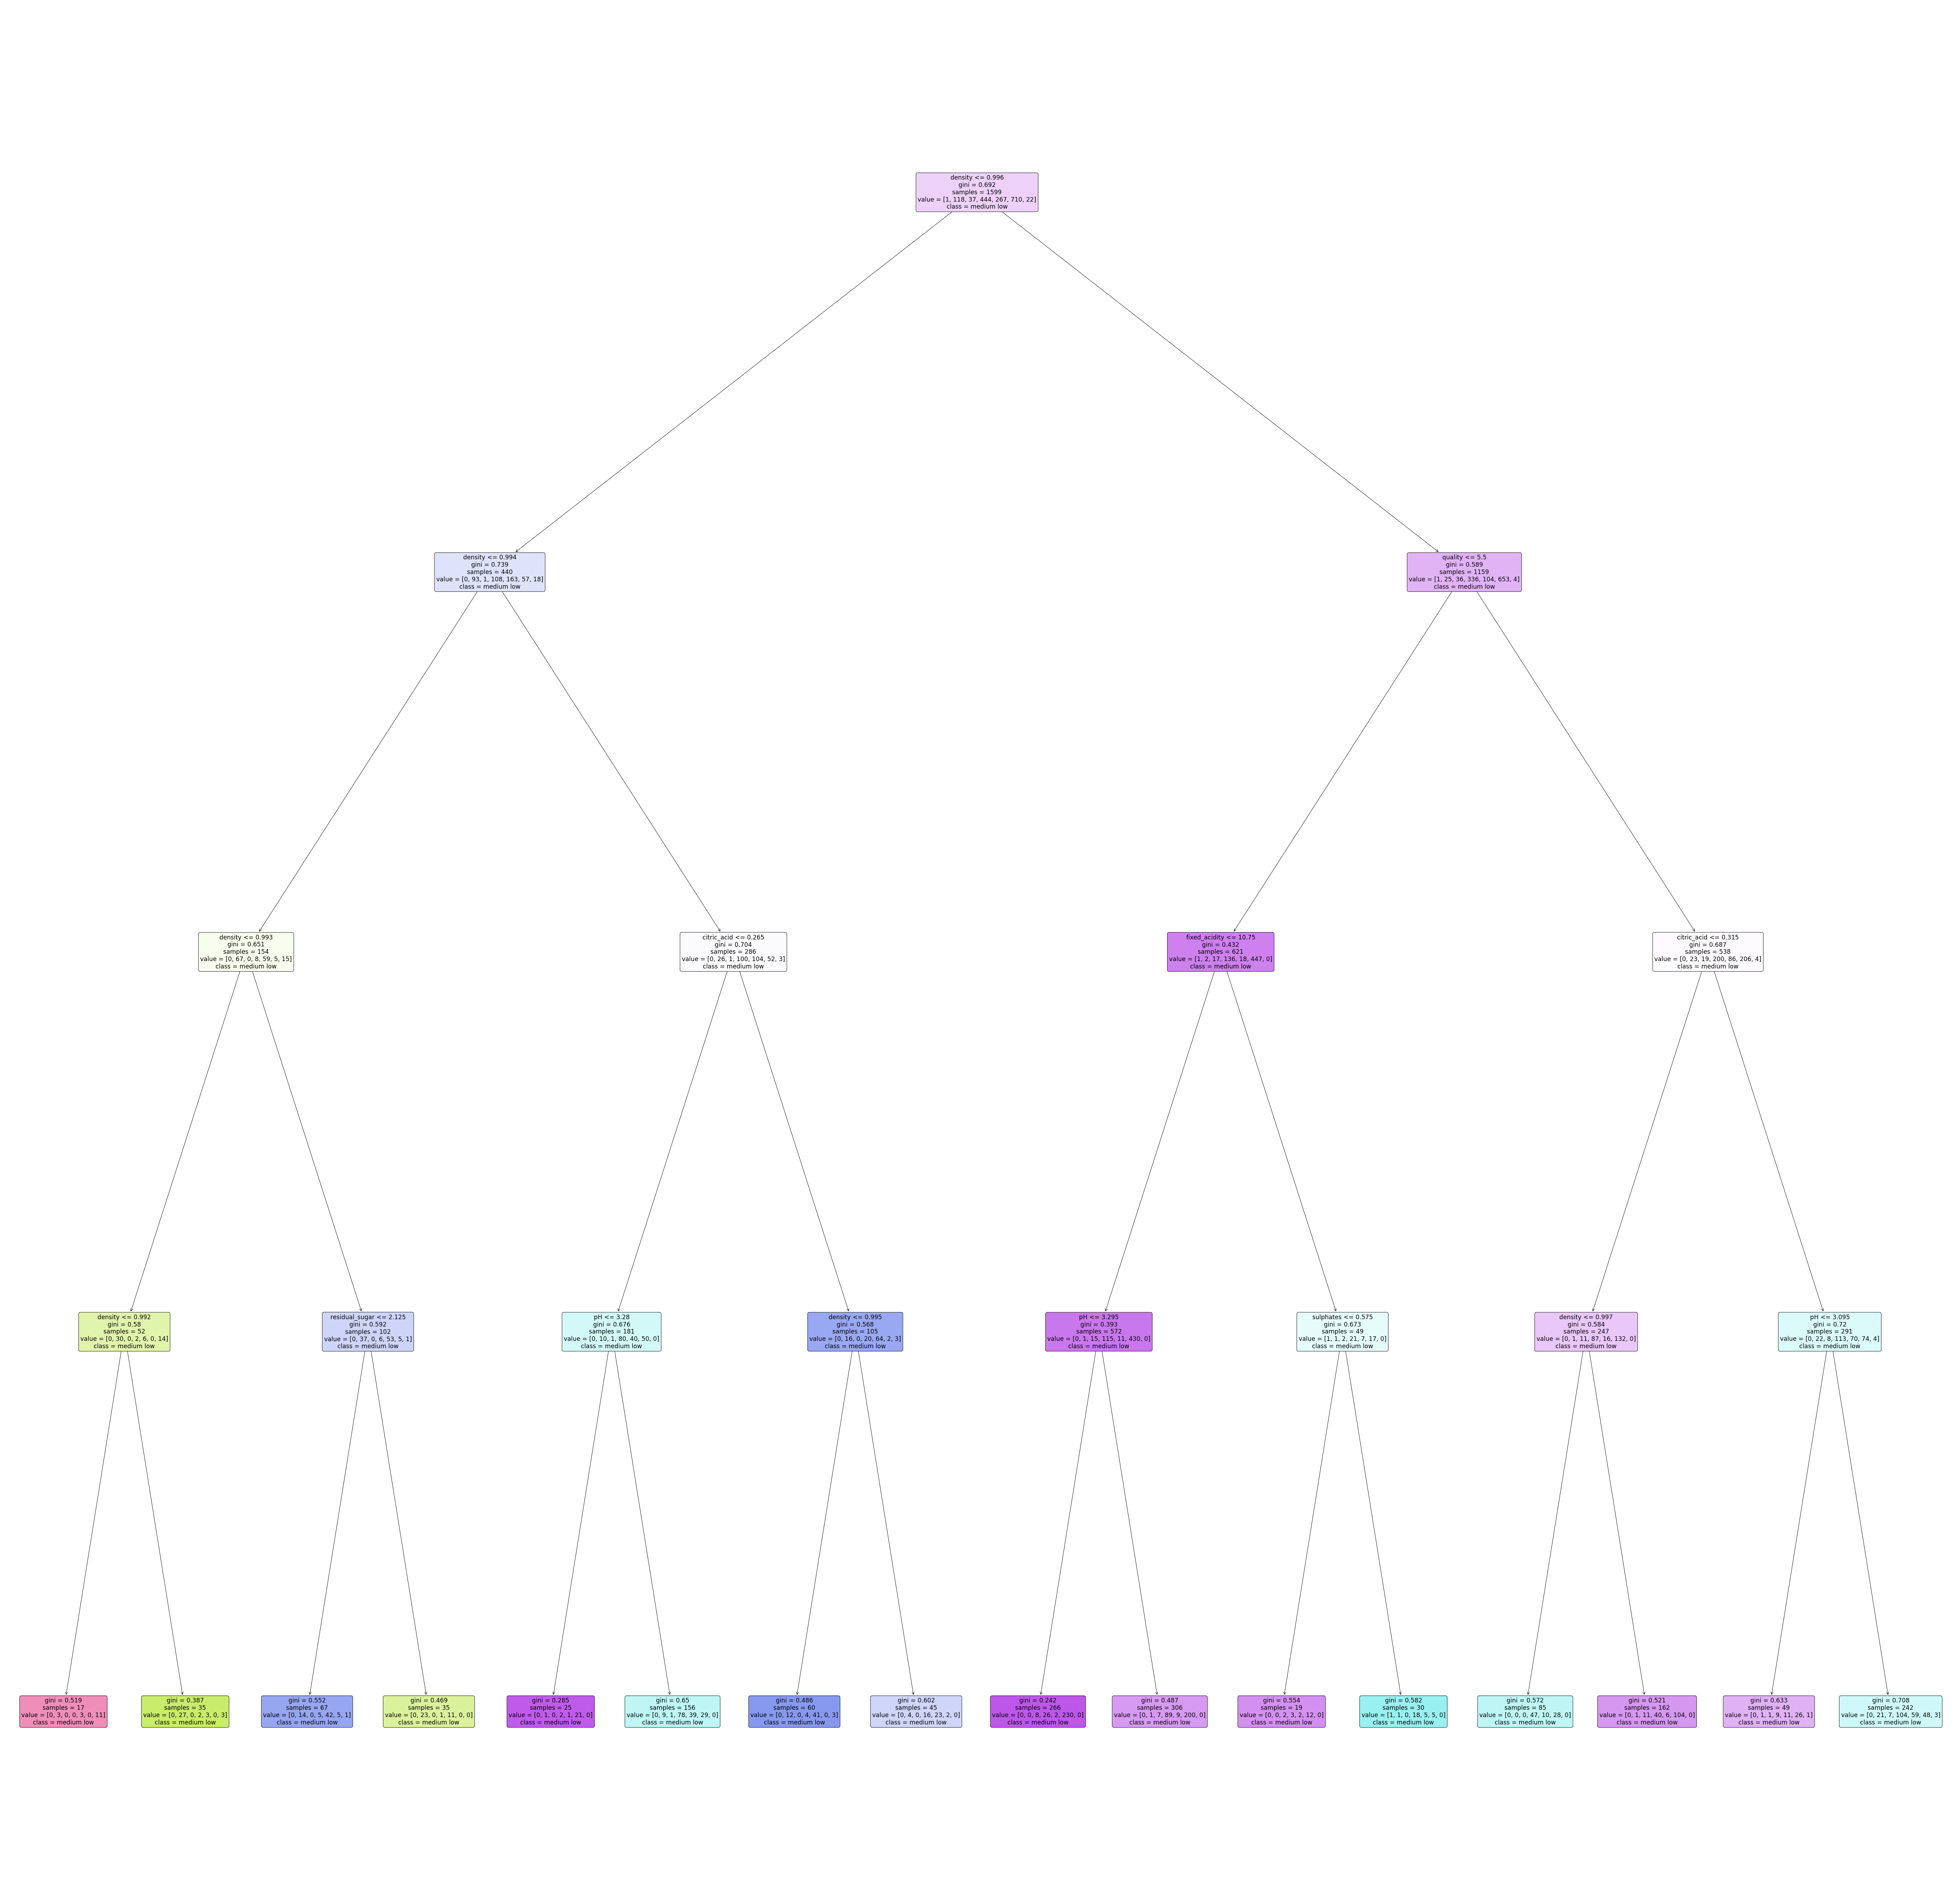

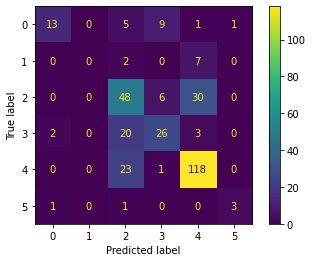

In [383]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (100, 100))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 4, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()

**2 sprendimų medis, gylis 3**

Tikslumo paklaida:  0.5875


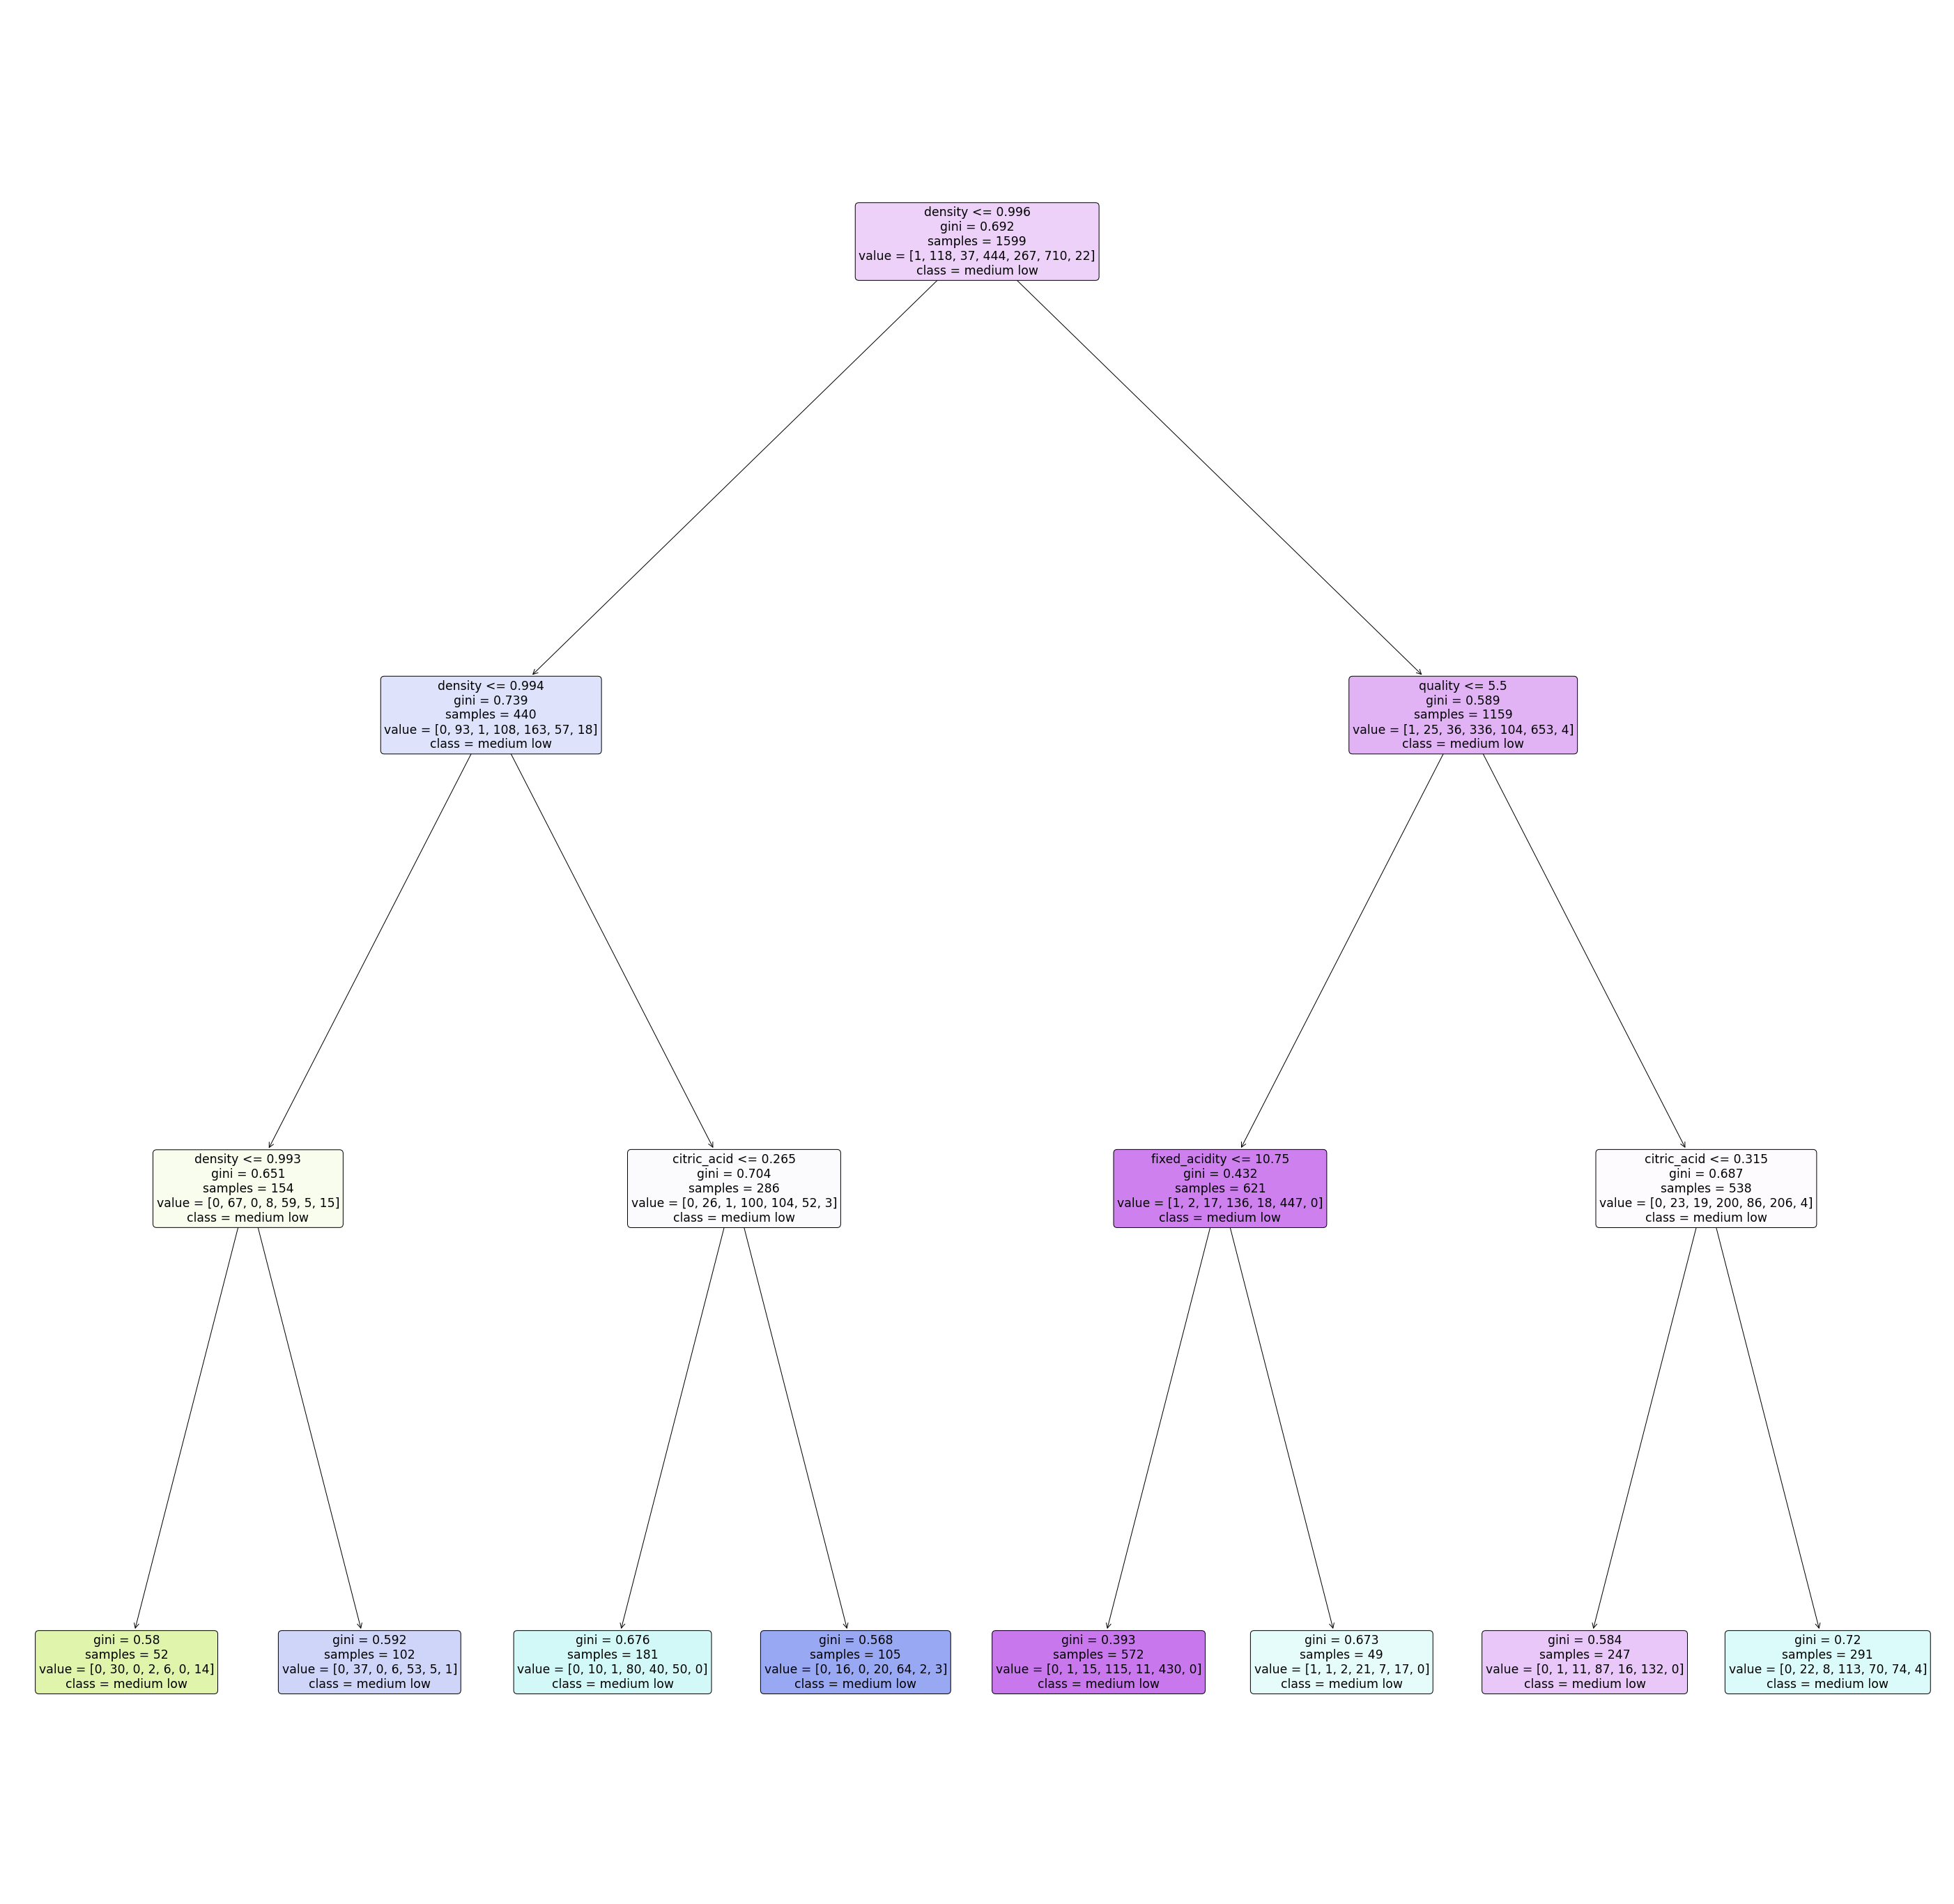

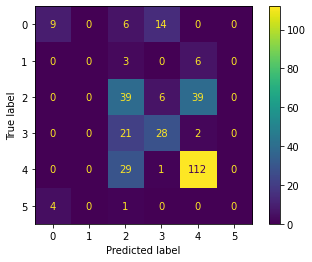

In [384]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (50, 50))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 3, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()

**3 sprendimų medis, gylis 2**

Tikslumo paklaida:  0.53125


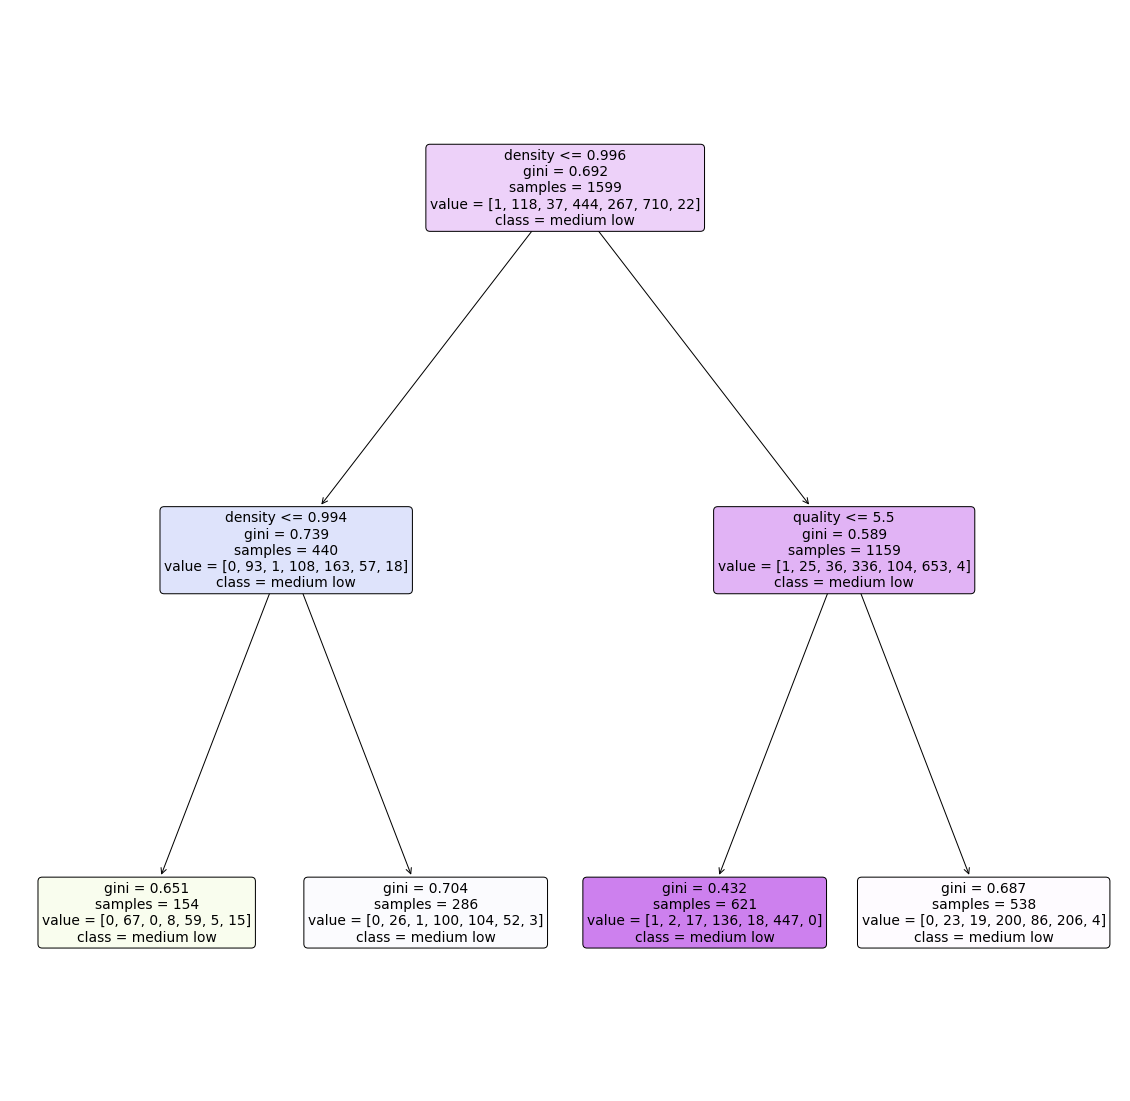

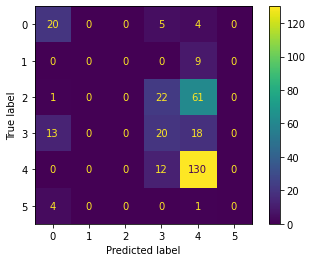

In [385]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (20, 20))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 2, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()

**4 sprendimų medis, gylis 6**

Tikslumo paklaida:  0.75


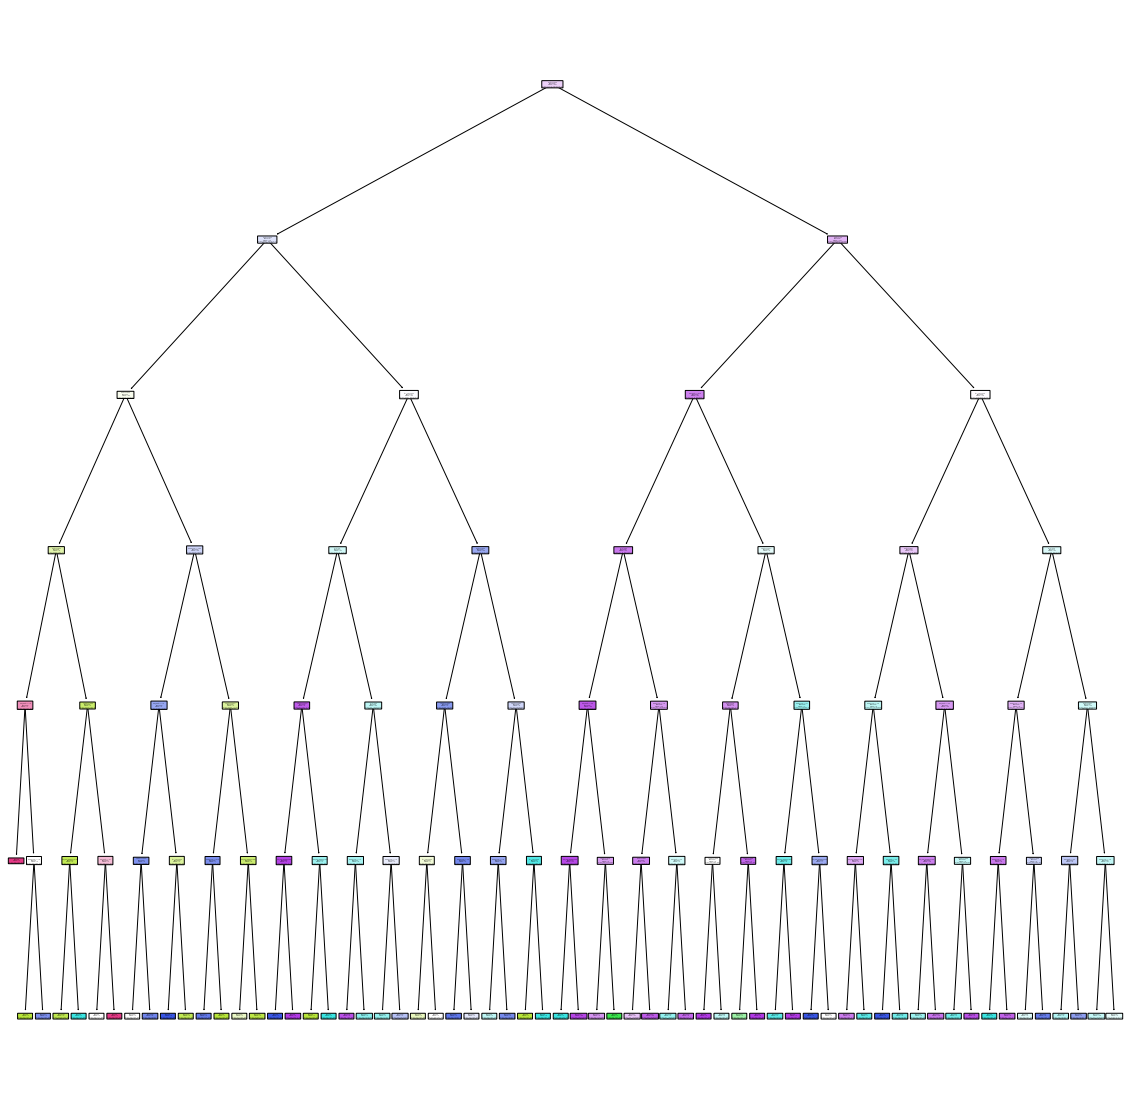

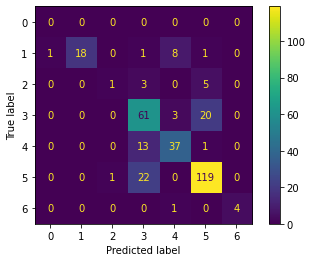

In [393]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (20, 20))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 10, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()

**Prognozės ir rezultato palyginimas**

In [386]:
score = pd.DataFrame({'Rezultatas': y_test, 'Prognozė': y_predict})
score.head()

Rezultatas     Prognozė
803   medium low   medium low
124   medium low   medium low
350   medium low   medium low
682   medium low   medium low
1326      medium  medium high

**1 Atsitiktinis miškas, 3 medžiai**

Tikslumo paklaida:  0.734375


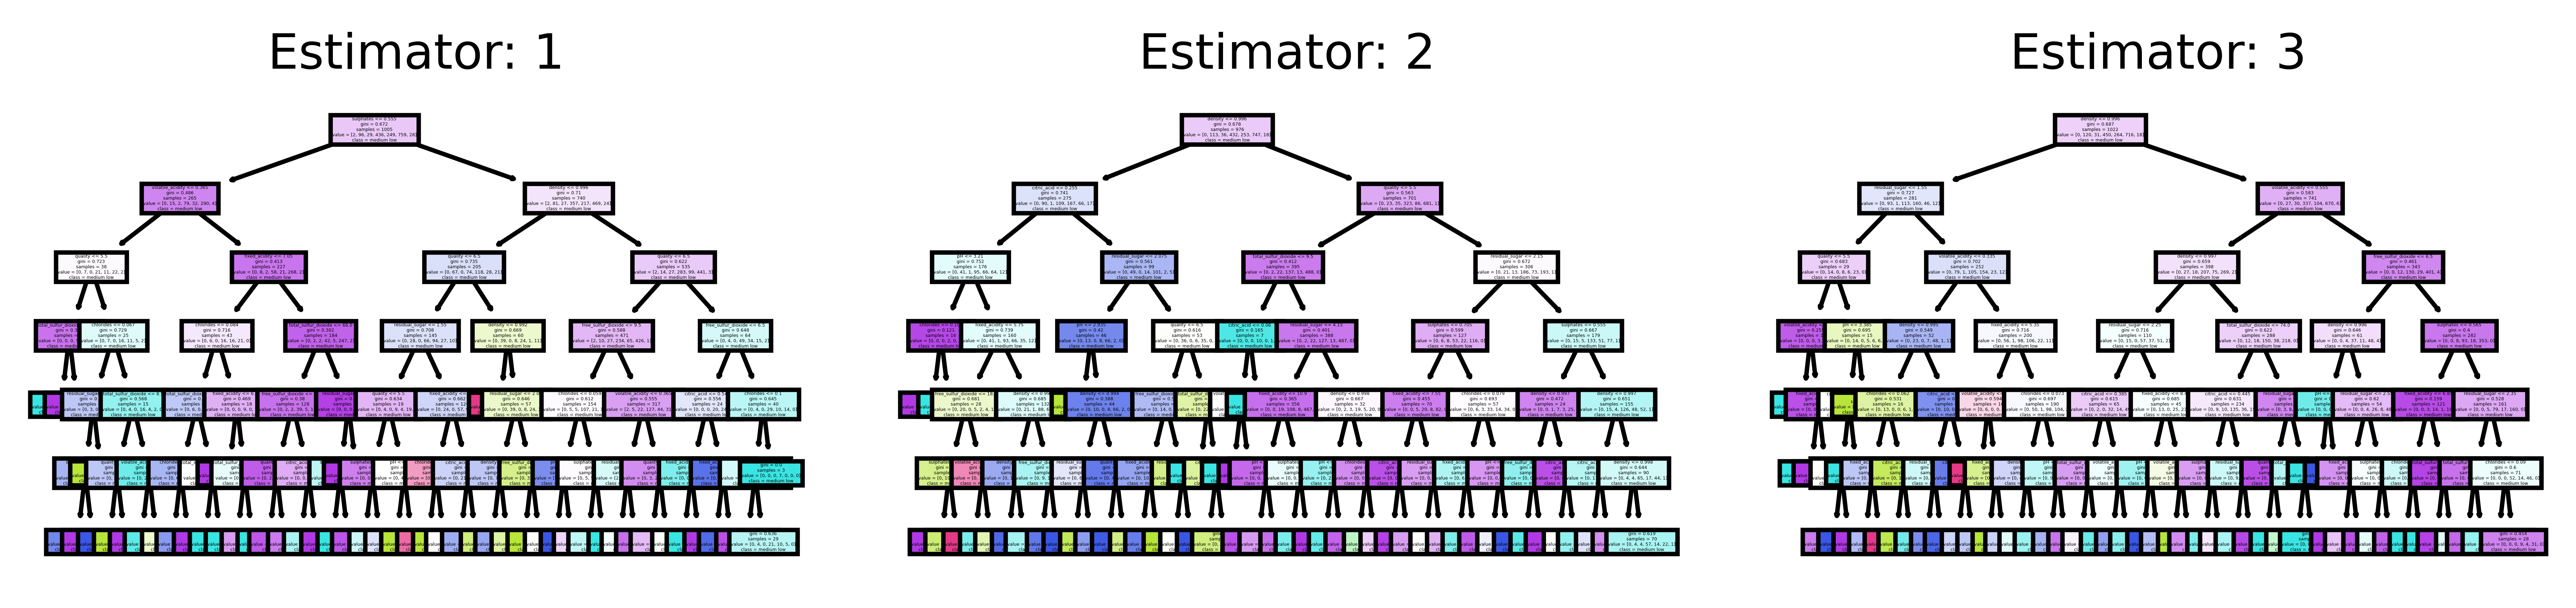

In [394]:
clf = RandomForestClassifier(n_estimators=3, max_depth=6, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)


**2 Atsitiktinis miškas, 4 medžiai**

Tikslumo paklaida:  0.73125


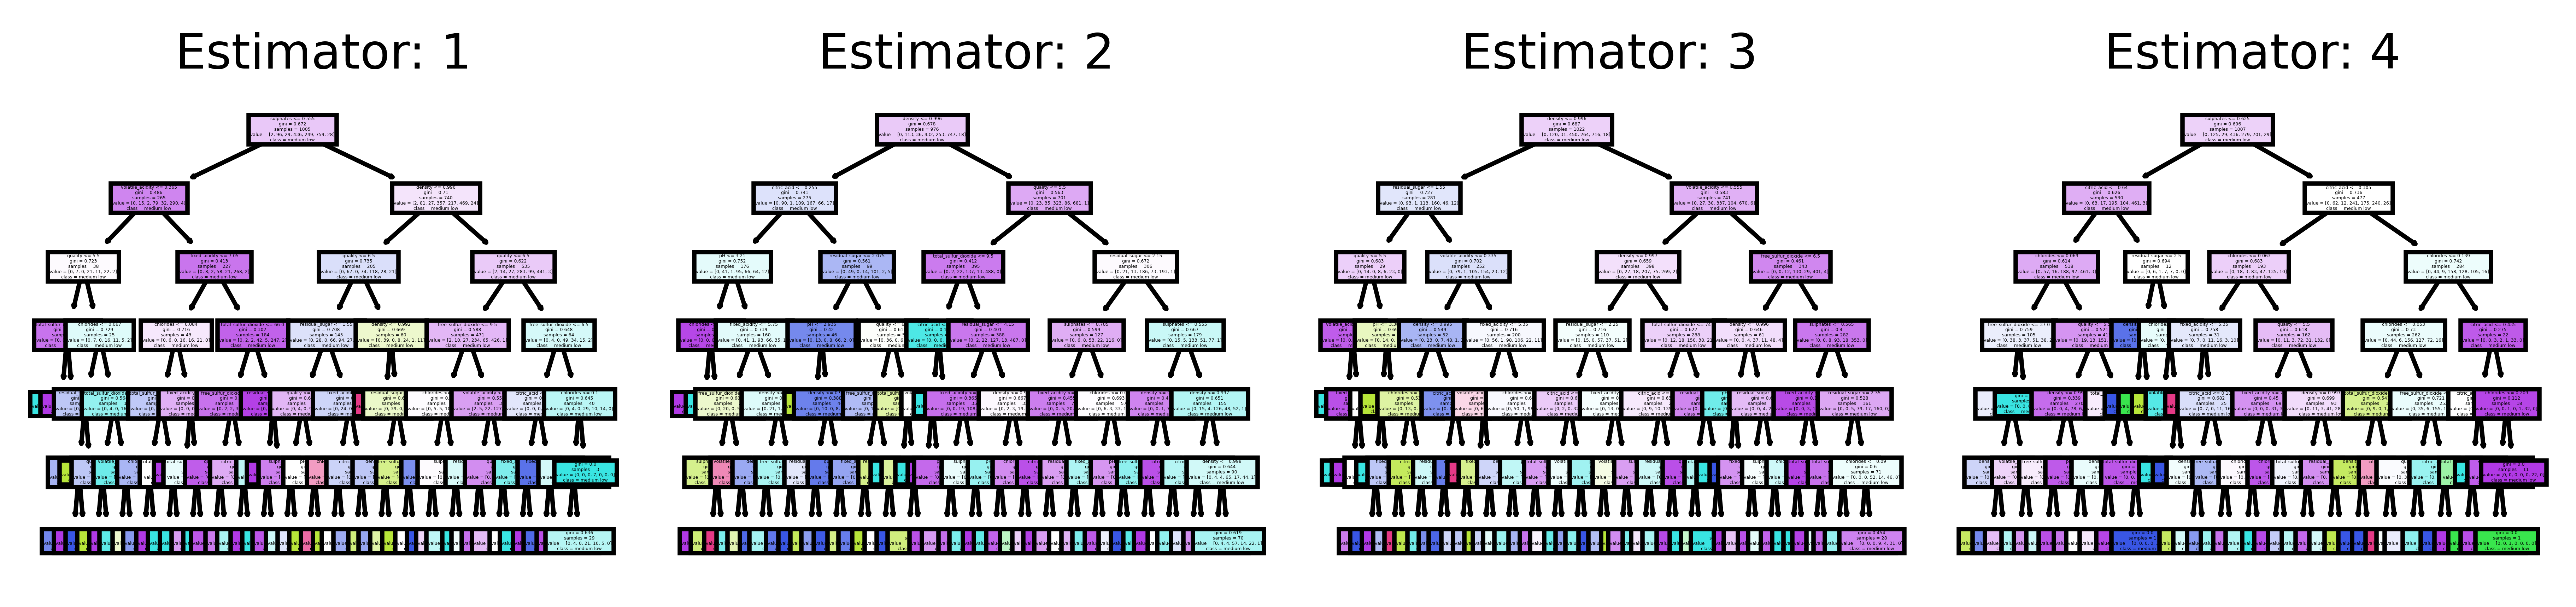

In [395]:
clf = RandomForestClassifier(n_estimators=4, max_depth=6, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)

**3 Atsitiktinis miškas, 5 medžiai**

Tikslumo paklaida:  0.75625


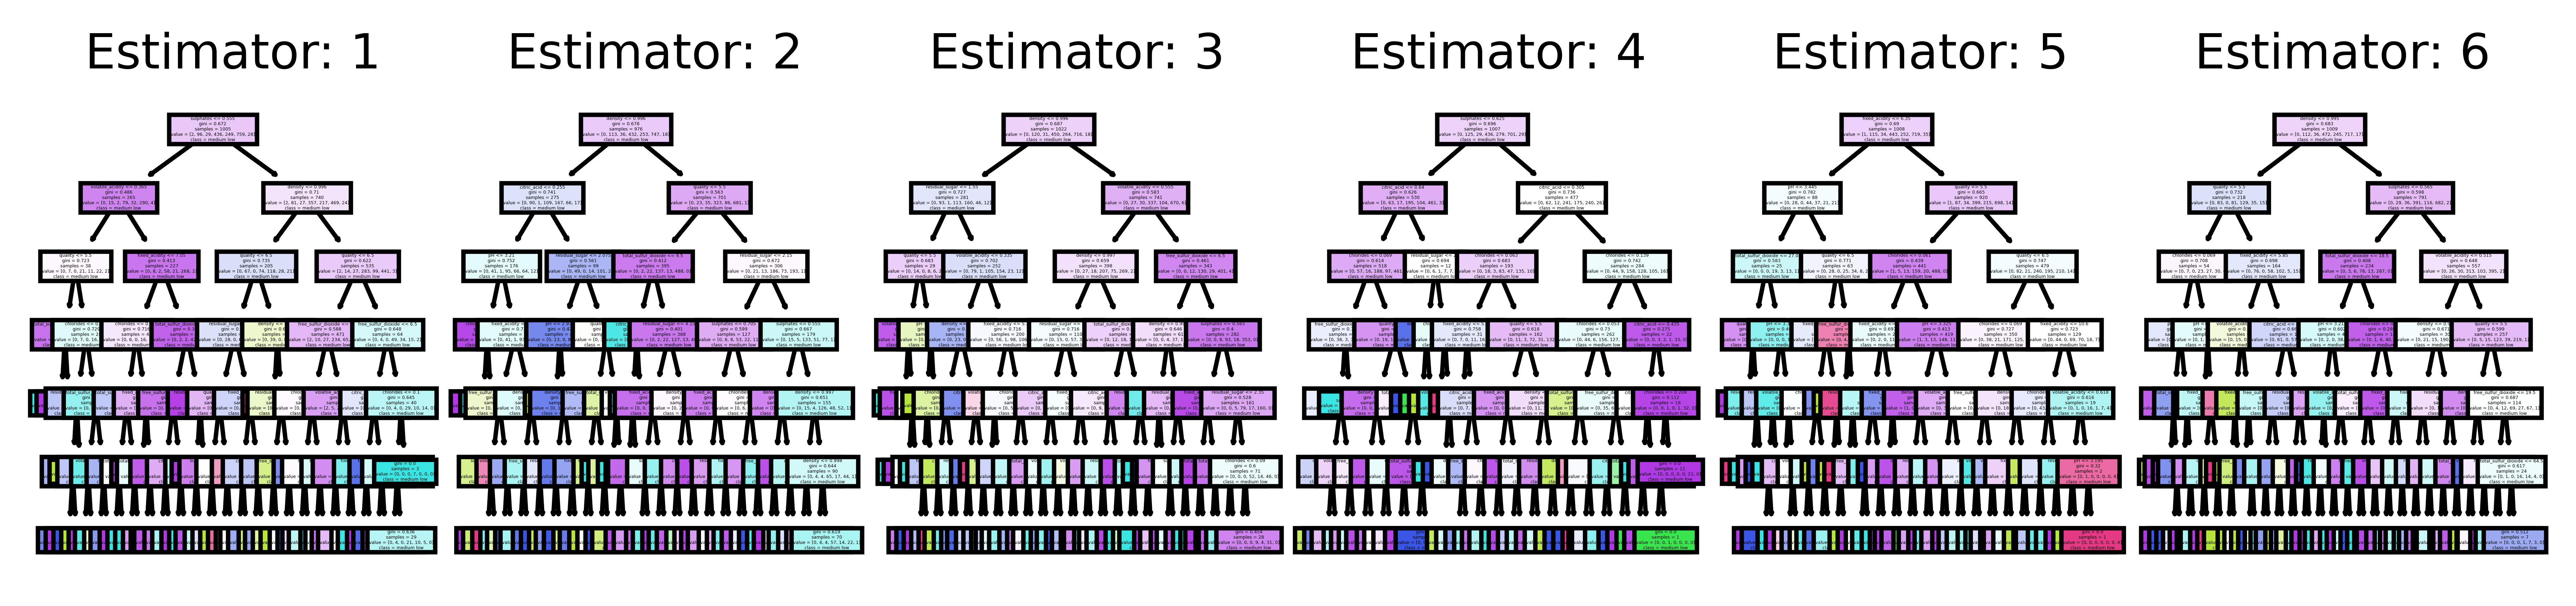

In [396]:
clf = RandomForestClassifier(n_estimators=6, max_depth=6, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Tikslumo paklaida: ", accuracy_score(y_test, y_predict))
fig, axes = plt.subplots(nrows = 1,ncols = 6,figsize = (10,2), dpi=900)
for index in range(0, 6):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)